In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as time

In [2]:
SincP = 5.0

# source output
def wsrc(t):
    return np.sinc(SincP*t)

# helper functions
def dist(src,x,y):
    (x0,y0) = src
    return np.sqrt((x0-x)**2+(y0-y)**2)

def dist_obj(src,obj,x,y):
    (x0,y0) = src
    (x1,y1) = obj
    return np.sqrt((x0-x1)**2+(y0-y1)**2)+np.sqrt((x1-x)**2+(y1-y)**2)

In [3]:
#class Setup():
    def __init__(self,src, obstacle, Nmics, Nsamp, dist_per_samp, C, pitch):
        self.src = src
        self.obstacle = obstacle
        self.Nmics = Nmics
        self.Nsamp = Nsamp
        self.dist_per_samp = dist_per_samp
        self.C = C
        self.pitch = pitch
        
        self.find_mic_positions()

    # Find the position of the mics on the y-axis
    def find_mic_positions(self):
        self.mics = []
        for n in range(self.Nmics):
            self.mics.append(self.pitch/2 + (n-self.Nmics/2)*self.pitch)
        self.mics = np.array(self.mics)

    # Simulate the data received by the mics 
    def find_mic_data(self):
        self.mic_data = np.zeros((self.Nmics, self.Nsamp))  # initialise array
        for j in range(self.Nmics):
            for i in range(self.Nsamp):
                d = dist_obj(self.src, self.obstacle,0,self.mics[j])  # calculate total distance from source and obstacle
                t = d/self.C
                self.mic_data[j][i] += wsrc(i*self.dist_per_samp/self.C-t)  # obtain data by shfting time

    # function to plot the mic's datas as colormap
    def plot_mic_data(self):
        y = np.arange(Nmics)
        x = np.arange(Nsamp)
        z = self.mic_data
        plt.imshow(z,cmap='plasma',aspect='equal',extent=(x.min(), x.max(), y.min(), y.max()))
        plt.show()

    # for given distances and mic, returns the corresponding data
    def digital_output(self,mic_data, d):
        i = ((d/self.dist_per_samp).astype(int))
        if i>=self.Nsamp:
            return 0
        return mic_data[i]

    # Perform delay and sum for the given data of mics and returns the amplitude data
    def DAS(self, mic_data):
        Nmics, Nsamp = mic_data.shape
        z = np.zeros((Nmics, Nsamp), dtype=np.float64) # initialise arrays
        
        for i in range(Nsamp):
            for j in range(Nmics):
                for k in range(Nmics):
                    # calculate total distance
                    d = dist((i*self.dist_per_samp,(j-1)*pitch+self.mics[0]) ,0,self.mics[k]) + dist(src, i*self.dist_per_samp, (j-1)*pitch+self.mics[0])
                    # add the mic datas
                    z[j][i]+=self.digital_output(mic_data[k],d)
        self.das = z

        # calculate maximum index
        mx_ind = np.unravel_index(np.argmax(z), z.shape) 
        y,x = mx_ind

        # calculate the coordinates corresponding the maximum indices
        x0 = x*self.dist_per_samp
        y0 = (y-1)*pitch+self.mics[0]

        # return das matrix and coordinates of maxima
        return self.das, (x0, y0)

    # plots the colormap 
    def plot_DAS(self,das):
        plt.imshow(das[:,:self.Nsamp//2],cmap = 'plasma')
        plt.show()
        

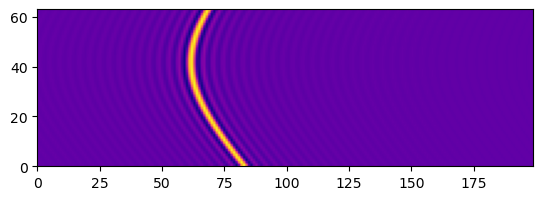

In [4]:
Nmics = 64
Nsamp = 200
src = (0,0)
obstacle = (3,-1)
C = 1

dist_per_samp = 0.1
pitch = 0.1

# create object
setup = Setup(src, obstacle, Nmics, Nsamp, dist_per_samp, C, pitch)
setup.find_mic_data()
setup.plot_mic_data()  # plot the generated mic data

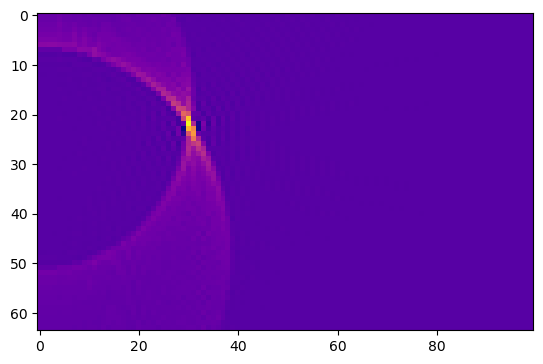

coordinates of maxima =  3.0 -1.0500000000000003


In [5]:
z, (x0,y0) = setup.DAS(setup.mic_data)
setup.plot_DAS(z)

print('coordinates of maxima = ',x0,y0)

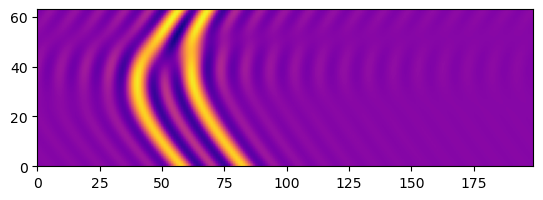

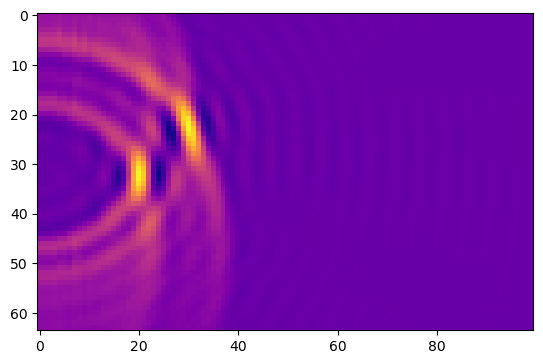

coordinates of maxima =  3.0 -0.9500000000000002


In [7]:
rx2 = np.loadtxt('rx2.txt')

Nmics, Nsamp = rx2.shape

pitch = 0.1
dist_per_samp = 0.1
C = 1

src = (0,0)
obstacle = (-1,-1)

setup = Setup(src, obstacle, Nmics, Nsamp, dist_per_samp, C, pitch)

setup.mic_data = rx2
setup.plot_mic_data()
a = 0.5

z, (x0,y0) = setup.DAS(rx2)

setup.plot_DAS(z)

print('coordinates of maxima = ',x0,y0)

(64, 200)


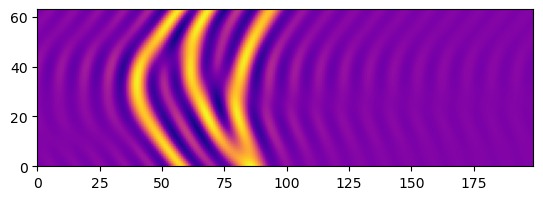

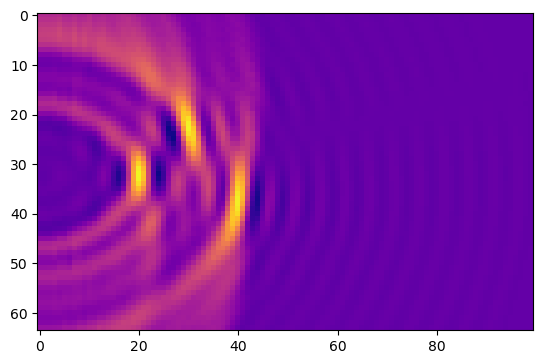

coordinates of maxima =  2.0 -0.050000000000000266


In [8]:
rx2 = np.loadtxt('rx3.txt')
# rx2 = rx2[[0,10,16]]

print(rx2.shape)
Nmics, Nsamp = rx2.shape

pitch = 0.1
dist_per_samp = 0.1
C = 1

src = (0,0)
obstacle = (-1,-1)

setup = Setup(src, obstacle, Nmics, Nsamp, dist_per_samp, C, pitch)

setup.mic_data = rx2
setup.plot_mic_data()
a = 0.5

z, (x0,y0) = setup.DAS(rx2)
setup.plot_DAS(z)

print('coordinates of maxima = ',x0,y0)

#28.29 0.0

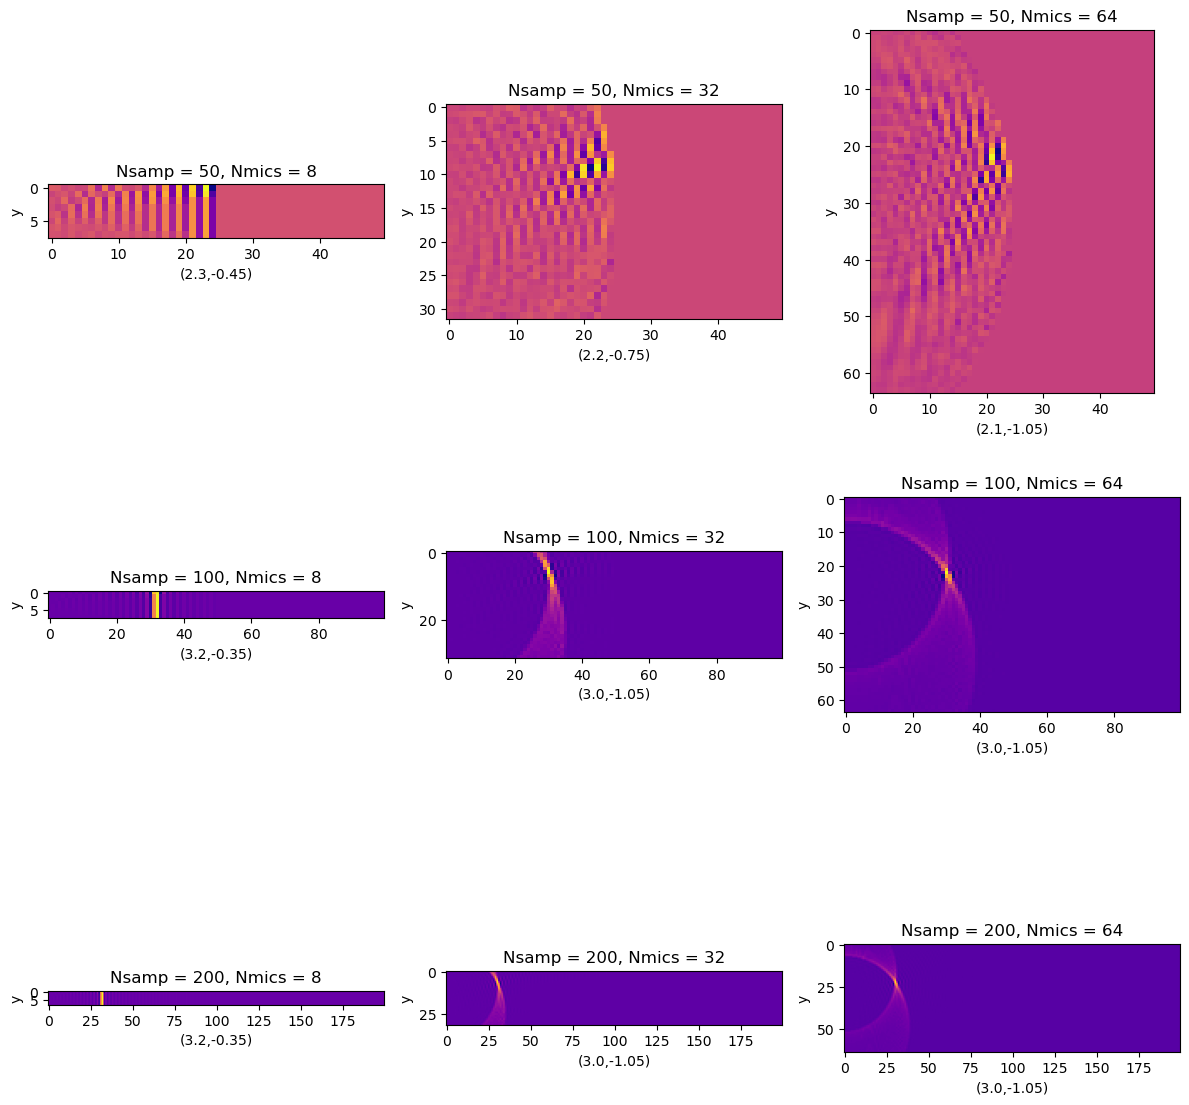

In [17]:
src = (0,0)
obstacle = (3,-1)
C = 1

dist_per_samp = 0.1
pitch = 0.1

Nmics = [8, 32, 64]
Nsamp = [50, 100, 200]

# Create a 3x3 figure
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Iterate over Nsamp and Nmics
for i, m in enumerate(Nsamp):
    for j, n in enumerate(Nmics):
        setup = Setup(src, obstacle, n, m, dist_per_samp, C, pitch)
        setup.find_mic_data()

        z,  (x0,y0) = setup.DAS(setup.mic_data)
        
        ax = axs[i, j]
        ax.imshow(z,cmap='plasma')  
        ax.set_title(f'Nsamp = {m}, Nmics = {n}')
        ax.set_xlabel(f'({round(x0,2)},{round(y0,2)})')
        ax.set_ylabel('y')  
        
plt.tight_layout()
plt.show()